In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Shape of Train data: ",train.shape)
print("Shape of Test data: ",test.shape)

Shape of Train data:  (7352, 564)
Shape of Test data:  (2947, 564)


In [4]:
## dividing the data into dependent and independent data
xtrain = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
ytrain = train['ActivityName']

xtest = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
ytest = test['ActivityName']
print("Done....")

Done....


In [5]:
print('xtrain and ytrain : ({},{})'.format(xtrain.shape, ytrain.shape))
print('xtest  and ytest  : ({},{})'.format(xtest.shape, ytest.shape))

xtrain and ytrain : ((7352, 561),(7352,))
xtest  and ytest  : ((2947, 561),(2947,))


# Scaling the Data

In [6]:
sc = StandardScaler()
xtrain  = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [20]:
print(log_reg_grid.best_params_)

{'C': 1, 'penalty': 'l2'}


In [21]:
from sklearn import metrics
ypred = log_reg_grid.predict(xtest)
print("Accuracy score is: ",metrics.accuracy_score(ytest,ypred)*100)

Accuracy score is:  95.48693586698337


In [22]:
cf_log = metrics.confusion_matrix(ytest,ypred)
print("confusion metrics: \n",cf_log)

confusion metrics: 
 [[533   0   4   0   0   0]
 [  1 428  60   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   1   7 396  16]
 [  0   0   0  24   1 446]]


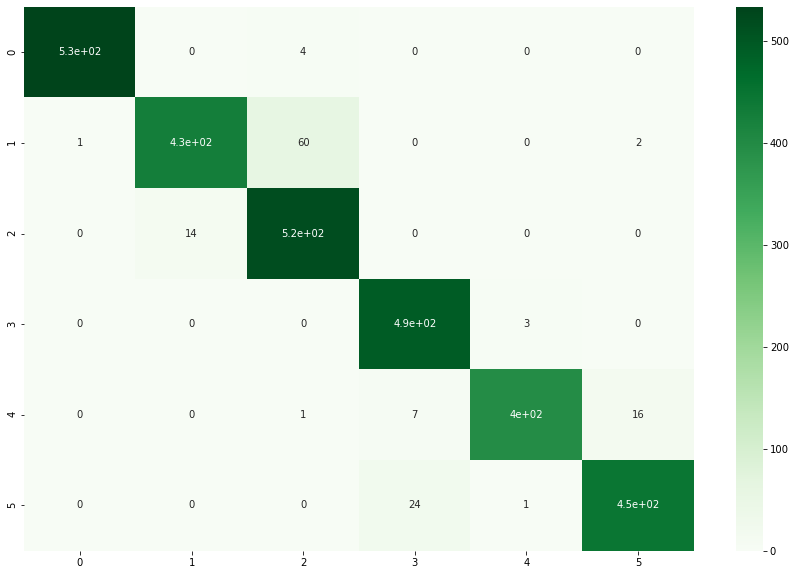

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cf_log,annot=True,cmap=plt.cm.Greens)
plt.show()